In [37]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', 15)

In [38]:
# ------------------------- Load data ----------------------------

In [39]:
# load bitcoin scaled data
bitcoin_scale = pd.read_csv ('/home/sunny/NWU/EECS349/Bitcoin_Price_Predictor/code/bitcoin_price_scaled.csv', \
                       parse_dates = True, index_col = [0])

In [40]:
# check data
bitcoin_scale

,Open,Close,Volume,Market Cap
0,-0.455745,-0.456843,-0.299032,-0.448995
1,-0.456037,-0.453352,-0.299032,-0.449183
2,-0.452796,-0.455224,-0.299032,-0.447038
3,-0.454491,-0.462664,-0.299032,-0.448144
4,-0.462159,-0.466646,-0.299032,-0.453187
5,-0.465594,-0.469168,-0.299032,-0.455443
6,-0.468357,-0.464182,-0.299032,-0.457257
...,...,...,...,...
1753,2.413988,2.707144,2.522310,2.438914
1754,2.715180,2.934215,2.934818,2.740778


In [41]:
# ----------------------- Data preparation --------------------------

In [42]:
# shuffle the data
np.random.seed(0)
shuffle_indices = np.random.permutation(np.arange(0, bitcoin_scale.shape[0]))
bitcoin_scale_shuffle = bitcoin_scale.iloc[shuffle_indices]
# split data into training set and testing set (9:1)
split = int(0.9 * bitcoin_scale.shape[0])
train_data = bitcoin_scale_shuffle[0 : split]
test_data = bitcoin_scale_shuffle[split :]

In [43]:
# extract input and output training set
x_train = train_data[['Open', 'Volume', 'Market Cap']]
y_train = train_data[['Close']]

# extract input and output test set
x_test = test_data[['Open', 'Volume', 'Market Cap']]
y_test = test_data[['Close']]

In [44]:
# ---------------------- Ridge (Linear) regression --------------------------------

In [45]:
clf = Ridge(alpha = 1.0)
result = clf.fit(x_train, y_train)
y_predict = result.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print("The mean squared error is", str(mse))

The mean squared error is 0.006071465659174263


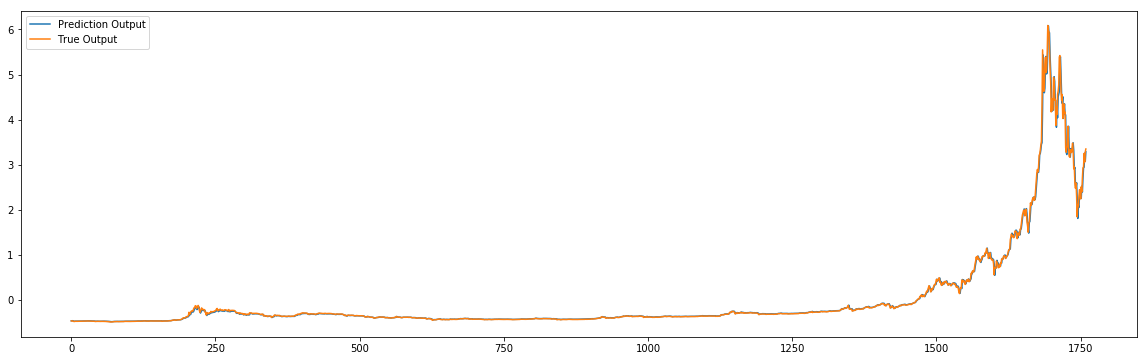

In [46]:
# plot the data by using original (unshuffled) data
y_prediction = result.predict(bitcoin_scale.iloc[:,[0,2,3]])
y_test = bitcoin_scale[['Close']]

plt.figure(figsize = (20, 6))
plt.plot(y_prediction, label = 'Prediction Output')
plt.plot(y_test, label = 'True Output')
plt.legend(loc = 'best')
plt.show()